### Objective

- Learn how to implement t-SNE on a real-world dataset (Socio-economic data by country)
- Use t-SNE to plot the high dimensional data on a 2D graph

# Example 1

In [1]:
# Importing important libraries
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
# Importing data and transforming using PCA
country_data = pd.read_csv("https://raw.githubusercontent.com/curlsloth/IK_teaching/main/Country_socioeconomic-data.csv")

# checking for outliers using the Z-score

from scipy import stats

z = np.abs(stats.zscore(country_data[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]))
print(z)

print("\n")
print("*******************************************************************************")
print("\n")

# threshold = 3  # selecting 3 as the threshold to identify outliers
print('Below are the outlier points along with the respective column numbers in the second array')
print("\n")
print(np.where(z > 3))


# Removing the outliers

country_data_outliers_removed = country_data[(z<3).all(axis=1)]


X = country_data_outliers_removed.drop('country',axis =1)
y = country_data_outliers_removed['country']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

     child_mort   exports    health   imports    income  inflation  \
0      1.291532  1.138280  0.279088  0.082455  0.808245   0.157336   
1      0.538949  0.479658  0.097016  0.070837  0.375369   0.312347   
2      0.272833  0.099122  0.966073  0.641762  0.220844   0.789274   
3      2.007808  0.775381  1.448071  0.165315  0.585043   1.387054   
4      0.695634  0.160668  0.286894  0.497568  0.101732   0.601749   
..          ...       ...       ...       ...       ...        ...   
162    0.225578  0.200917  0.571711  0.240700  0.738527   0.489784   
163    0.526514  0.461363  0.695862  1.213499  0.033542   3.616865   
164    0.372315  1.130305  0.008877  1.380030  0.658404   0.409732   
165    0.448417  0.406478  0.597272  0.517472  0.658924   1.500916   
166    1.114951  0.150348  0.338015  0.662477  0.721358   0.590015   

     life_expec  total_fer      gdpp  
0      1.619092   1.902882  0.679180  
1      0.647866   0.859973  0.485623  
2      0.670423   0.038404  0.465376  
3  

## t-SNE

In [3]:
# Import libraries
from sklearn.manifold import TSNE

In [4]:
# Fit tSNE model
tsne = TSNE(random_state=123)
tsne_results = tsne.fit_transform(X_scaled_df)

<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

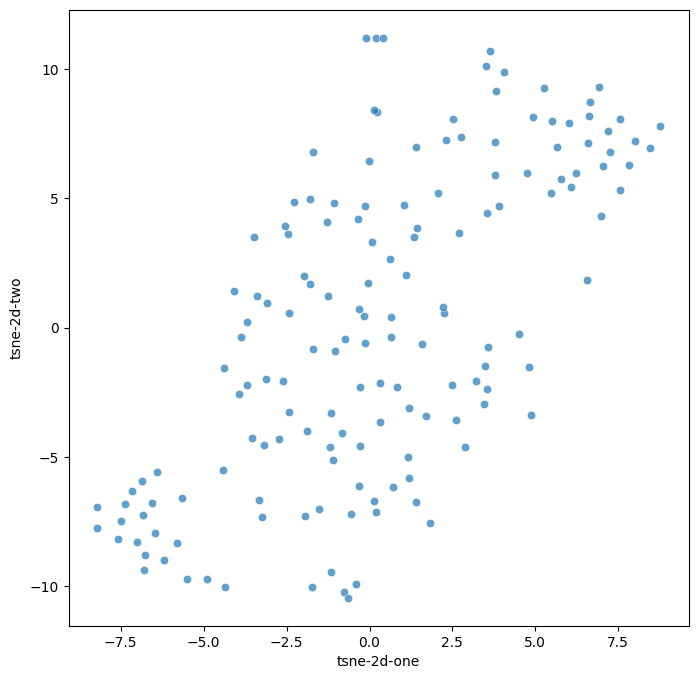

In [6]:
# Visualize tSNE components on a 2D plot
X_scaled_df['tsne-2d-one'] = tsne_results[:,0]
X_scaled_df['tsne-2d-two'] = tsne_results[:,1]
X_scaled_df['y'] = y

plt.figure(figsize=(8,8))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    #hue="y",
    palette=sns.color_palette("hls", 2),
    data=X_scaled_df,
    legend=False,
    alpha=0.7
)

# Example 2

In [7]:
# from this website: https://www.datatechnotes.com/2020/11/tsne-visualization-example-in-python.html
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from numpy import reshape
import seaborn as sns
import pandas as pd

iris = load_iris()
x = iris.data
y = iris.target

In [8]:
iris_df = pd.DataFrame(x, columns=iris.feature_names)
iris_df['target'] = y
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
# Fit tSNE model
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.001s...
[t-SNE] Computed neighbors for 150 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.509910
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.972595
[t-SNE] KL divergence after 1000 iterations: 0.124735


In [10]:
pd.DataFrame(z)

,0,1
0,-23.580931,-0.522060
1,-26.291704,-1.093696
2,-26.193335,0.053057
3,-26.638256,-0.321696
4,-23.545013,-0.941377
...,...,...
145,11.363099,-4.289077
146,10.691204,-1.015444
147,11.097084,-3.357184
148,13.195991,-3.724547


[Text(0.5, 1.0, 'Iris data T-SNE projection')]

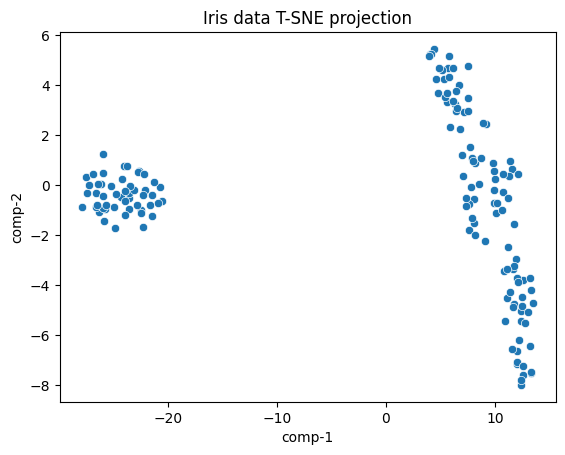

In [12]:
# Visualize tSNE components on a 2D plot

df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2",
                #hue=df.y.tolist(),
                palette=sns.color_palette("hls", 3),
                data=df).set(title="Iris data T-SNE projection")

In [ ]:
from sklearn.cluster import KMeans
x = [(1, 2), (3, 4), (5, 6), (7, 8), (9, 10)]
KMeans(n_clusters=2).fit(x).cluster_centers_

array([[2., 3.],
       [7., 8.]])